<a href="https://colab.research.google.com/github/kshitizbali/guild-mle-projects/blob/main/Student_MLE_MiniProject_Churn_Prediction_AWS_STANDALONE_IMPLEMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the customer retention dataset from `/content/sample_data/storedata_total.csv` to predict the 'retained' field, which is the target variable. The analysis should include data loading, exploration, cleaning, feature engineering, data preparation (splitting into training and testing sets), machine learning model training, and evaluation of the model's performance using the AUC ROC metric. Finally, summarize the entire process and the key insights from the model evaluation.

## Load and Inspect Data

### Subtask:
Load the dataset from `/content/sample_data/storedata_total.csv` into a pandas DataFrame. Conduct an initial inspection to check its shape, data types, and head of the data, noting that the user mentioned an XLSX file, but the provided path is for a CSV.


**Reasoning**:
Load the dataset from the specified CSV file into a pandas DataFrame and perform an initial inspection by displaying the first 5 rows, checking its shape, and data types.



In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/sample_data/storedata_total.csv')
print("Dataset loaded successfully.")

# Display the first 5 rows
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# Print the shape of the DataFrame
print("\nShape of the DataFrame (rows, columns):")
print(df.shape)

# Print the data types of each column
print("\nData types of each column:")
print(df.dtypes)

Dataset loaded successfully.

First 5 rows of the DataFrame:
   custid  retained     created  firstorder  lastorder  esent   eopenrate  \
0  6H6T6N         0   9/28/2012   8/11/2013  8/11/2013     29  100.000000   
1  APCENR         1  12/19/2010    4/1/2011  1/19/2014     95   92.631579   
2  7UP6MS         0   10/3/2010   12/1/2010   7/6/2011      0    0.000000   
3  7ZEW8G         0  10/22/2010   3/28/2011  3/28/2011      0    0.000000   
4  8V726M         1  11/27/2010  11/29/2010  1/28/2013     30   90.000000   

   eclickrate  avgorder   ordfreq  paperless  refill  doorstep     favday city  
0    3.448276     14.52  0.000000          0       0         0     Monday  DEL  
1   10.526316     83.69  0.181641          1       1         1     Friday  DEL  
2    0.000000     33.58  0.059908          0       0         0  Wednesday  DEL  
3    0.000000     54.96  0.000000          0       0         0   Thursday  BOM  
4   13.333333    111.91  0.008850          0       0         0     Mond

## Explore and Clean Data

### Subtask:
Perform comprehensive data exploration including checking for missing values, duplicates, and statistical summaries. Clean the data by handling missing values (e.g., imputation or removal) and addressing any inconsistencies identified.


**Reasoning**:
First, I will check for missing values in each column and display their counts and percentages. Then, I will identify and remove any duplicate rows, and confirm the new shape of the DataFrame.



In [33]:
print("\n--- Missing Values ---")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

print("\n--- Duplicate Rows ---")
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_rows}")

if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print(f"Duplicate rows removed. New DataFrame shape: {df.shape}")


--- Missing Values ---
            Missing Count  Missing Percentage
custid                 20            0.064933
created                20            0.064933
firstorder             20            0.064933
lastorder              20            0.064933

--- Duplicate Rows ---
Number of duplicate rows found: 0


**Reasoning**:
Now, I will display the descriptive statistics for all numerical columns to understand their distribution, including measures like mean, median, min, max, and standard deviation.



In [34]:
print(
"\n--- Descriptive Statistics for Numerical Columns ---"
)
print(df.describe())


--- Descriptive Statistics for Numerical Columns ---
           retained         esent     eopenrate    eclickrate      avgorder  \
count  30801.000000  30801.000000  30801.000000  30801.000000  30801.000000   
mean       0.794520     28.138405     25.554838      5.671139     61.873944   
std        0.404059     16.751380     29.557106     10.561704     41.007588   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000     16.000000      2.040816      0.000000     40.020000   
50%        1.000000     32.000000     13.207547      0.000000     50.970000   
75%        1.000000     42.000000     40.000000      7.142857     74.280000   
max        1.000000    291.000000    100.000000    100.000000   2600.140000   

            ordfreq     paperless        refill      doorstep  
count  30801.000000  30801.000000  30801.000000  30801.000000  
mean       0.037729      0.649037      0.095094      0.038895  
std        0.103932      0.477279      0.2

**Reasoning**:
Now, I will identify the categorical columns specified in the instructions and print the number of unique values for each. For 'favday' and 'city', I will also print their respective value counts to inspect for inconsistencies or imbalances.



In [35]:
print(
"\n--- Categorical Column Analysis ---"
)
categorical_cols = ['custid', 'created', 'firstorder', 'lastorder', 'favday', 'city']

for col in categorical_cols:
    print(f"\nColumn: {col}")
    unique_count = df[col].nunique()
    print(f"Number of unique values: {unique_count}")
    if col in ['favday', 'city']:
        print("Value counts:")
        print(df[col].value_counts())



--- Categorical Column Analysis ---

Column: custid
Number of unique values: 30769

Column: created
Number of unique values: 2821

Column: firstorder
Number of unique values: 2672

Column: lastorder
Number of unique values: 2414

Column: favday
Number of unique values: 7
Value counts:
favday
Monday       6762
Tuesday      6755
Friday       5291
Thursday     5290
Wednesday    4828
Saturday     1245
Sunday        630
Name: count, dtype: int64

Column: city
Number of unique values: 4
Value counts:
city
BOM    11566
DEL     8789
MAA     8748
BLR     1698
Name: count, dtype: int64


**Reasoning**:
Missing values were identified in 'custid', 'created', 'firstorder', and 'lastorder' columns. Given the very small percentage of missing values (0.064933%) and that these columns include identifiers and date fields, removing the rows with missing values is a suitable approach to ensure data integrity and avoid issues in subsequent analysis or feature engineering. I will then confirm the new shape of the DataFrame.



In [36]:
print("\n--- Handling Missing Values ---")
initial_rows = df.shape[0]
df.dropna(subset=['custid', 'created', 'firstorder', 'lastorder'], inplace=True)
remaining_rows = df.shape[0]
print(f"Rows before dropping missing values: {initial_rows}")
print(f"Rows after dropping missing values: {remaining_rows}")
print(f"Number of rows removed: {initial_rows - remaining_rows}")
print(f"New DataFrame shape: {df.shape}")


--- Handling Missing Values ---
Rows before dropping missing values: 30801
Rows after dropping missing values: 30781
Number of rows removed: 20
New DataFrame shape: (30781, 15)


## Feature Engineering

### Subtask:
Create new features from existing ones and encode categorical variables.


**Reasoning**:
First, I will convert the 'created', 'firstorder', and 'lastorder' columns to datetime objects to enable time-based calculations.



In [37]:
print("\n--- Converting Date Columns to Datetime Objects ---")
df['created'] = pd.to_datetime(df['created'], errors='coerce')
df['firstorder'] = pd.to_datetime(df['firstorder'], errors='coerce')
df['lastorder'] = pd.to_datetime(df['lastorder'], errors='coerce')

print("Date columns converted successfully. Verifying dtypes:")
print(df[['created', 'firstorder', 'lastorder']].dtypes)


--- Converting Date Columns to Datetime Objects ---
Date columns converted successfully. Verifying dtypes:
created       datetime64[ns]
firstorder    datetime64[ns]
lastorder     datetime64[ns]
dtype: object


**Reasoning**:
The previous code failed because some date strings in 'firstorder' (and potentially other date columns) were not in a recognizable format. I will modify the `pd.to_datetime` calls to include `errors='coerce'` to handle these unparseable values by converting them to `NaT`, then drop any rows that contain these `NaT` values to ensure data integrity for subsequent date calculations. After converting the date columns, I will proceed with calculating the new time-based features, one-hot encoding the specified categorical variables, and finally dropping the original columns as per the instructions.



In [38]:
print("\n--- Converting Date Columns to Datetime Objects and Handling Unparseable Dates ---")
df['created'] = pd.to_datetime(df['created'], errors='coerce')
df['firstorder'] = pd.to_datetime(df['firstorder'], errors='coerce')
df['lastorder'] = pd.to_datetime(df['lastorder'], errors='coerce')

# Drop rows where date conversion resulted in NaT
initial_rows_after_coerce = df.shape[0]
df.dropna(subset=['created', 'firstorder', 'lastorder'], inplace=True)
remaining_rows_after_coerce = df.shape[0]
if initial_rows_after_coerce - remaining_rows_after_coerce > 0:
    print(f"Dropped {initial_rows_after_coerce - remaining_rows_after_coerce} rows with unparseable dates.")

print("Date columns converted successfully. Verifying dtypes:")
print(df[['created', 'firstorder', 'lastorder']].dtypes)

print("\n--- Calculating New Time-Based Features ---")
# Determine a reference date for calculating recency
reference_date = df['lastorder'].max()

# Calculate new features
df['customer_lifetime'] = (df['lastorder'] - df['firstorder']).dt.days
df['days_to_first_order'] = (df['firstorder'] - df['created']).dt.days
df['days_since_last_order'] = (reference_date - df['lastorder']).dt.days
df['days_since_created'] = (reference_date - df['created']).dt.days

print("New time-based features created: 'customer_lifetime', 'days_to_first_order', 'days_since_last_order', 'days_since_created'.")
print(df[['customer_lifetime', 'days_to_first_order', 'days_since_last_order', 'days_since_created']].head())

print("\n--- One-Hot Encoding Categorical Variables ---")
# Apply one-hot encoding to 'favday' and 'city'
df = pd.get_dummies(df, columns=['favday', 'city'], drop_first=True, dtype=int)
print("One-hot encoding applied to 'favday' and 'city'.")

print("\n--- Dropping Original Identifier and Date Columns ---")
# Drop original 'custid', 'created', 'firstorder', and 'lastorder' columns
df.drop(columns=['custid', 'created', 'firstorder', 'lastorder'], inplace=True)
print("Original 'custid', 'created', 'firstorder', and 'lastorder' columns dropped.")

print("\n--- Feature Engineering Complete ---")
print(f"Final DataFrame shape: {df.shape}")
print("First 5 rows of the DataFrame with new features:")
print(df.head())


--- Converting Date Columns to Datetime Objects and Handling Unparseable Dates ---
Dropped 23 rows with unparseable dates.
Date columns converted successfully. Verifying dtypes:
created       datetime64[ns]
firstorder    datetime64[ns]
lastorder     datetime64[ns]
dtype: object

--- Calculating New Time-Based Features ---
New time-based features created: 'customer_lifetime', 'days_to_first_order', 'days_since_last_order', 'days_since_created'.
   customer_lifetime  days_to_first_order  days_since_last_order  \
0                  0                  317                   1624   
1               1024                  103                   1463   
2                217                   59                   2391   
3                  0                  157                   2491   
4                791                    2                   1819   

   days_since_created  
0                1941  
1                2590  
2                2667  
3                2648  
4                2612 

## Prepare Data for Modeling

### Subtask:
Split the preprocessed data into training and testing sets (e.g., 80% train, 20% test) and ensure the 'retained' field is correctly identified as the target variable.


**Reasoning**:
I will separate the target variable 'retained' from the features into `y` and `X` respectively, then import `train_test_split` and use it to split the data into training and testing sets with a 80/20 ratio and a specified random state for reproducibility.



In [39]:
print("\n--- Preparing Data for Modeling ---")

# Separate target variable (y) and features (X)
X = df.drop('retained', axis=1)
y = df['retained']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


--- Preparing Data for Modeling ---
Features (X) shape: (30758, 21)
Target (y) shape: (30758,)
Data split into training and testing sets successfully.
X_train shape: (24606, 21)
X_test shape: (6152, 21)
y_train shape: (24606,)
y_test shape: (6152,)


## Train Machine Learning Model

### Subtask:
Select and train a suitable machine learning model (e.g., a classifier) using the training dataset to predict the 'retained' field.


**Reasoning**:
I will import the `LogisticRegression` model, instantiate it with a `random_state` for reproducibility, and then train the model using the prepared training data (`X_train`, `y_train`).



In [40]:
print("\n--- Training Machine Learning Model ---")
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver is good for small datasets and handles L1/L2 regularization

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")


--- Training Machine Learning Model ---
Logistic Regression model trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Reasoning**:
The previous Logistic Regression model issued a `ConvergenceWarning` indicating that the solver failed to converge. To address this, I will increase the `max_iter` parameter in the `LogisticRegression` instantiation, setting it to a higher value like 1000, to allow more iterations for convergence.



In [41]:
print("\n--- Training Machine Learning Model ---")
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model with increased max_iter to prevent convergence warning
model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000) # 'liblinear' solver is good for small datasets and handles L1/L2 regularization

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")


--- Training Machine Learning Model ---
Logistic Regression model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the test set by calculating the Area Under the Receiver Operating Characteristic Curve (AUC ROC) metric and visualize the ROC curve.


**Reasoning**:
To evaluate the trained model's performance, I will calculate the AUC ROC score and plot the ROC curve. This involves predicting probabilities, computing FPR and TPR, and then visualizing these metrics as instructed.




--- Evaluating Model Performance ---
AUC ROC Score: 0.9647


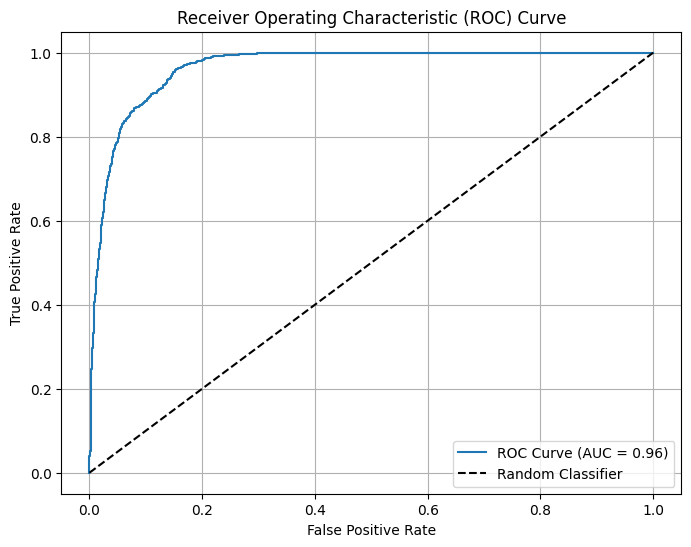

Model evaluation complete and ROC curve displayed.


In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

print("\n--- Evaluating Model Performance ---")

# Predict probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate AUC ROC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC ROC Score: {auc_score:.4f}")

# Compute FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

print("Model evaluation complete and ROC curve displayed.")

## Final Task

### Subtask:
Summarize the data preprocessing steps, the chosen model, its performance, and any key insights from the AUC ROC evaluation.


## Summary:

### Data Analysis Key Findings
*   **Data Loading and Initial Inspection**: The dataset, initially containing 30801 rows and 15 columns, was successfully loaded. It included customer identifiers, date fields, email engagement metrics, order statistics, and boolean flags, with 'retained' being the target variable.
*   **Data Cleaning**:
    *   20 rows with missing values in `custid`, `created`, `firstorder`, and `lastorder` (approximately 0.065% of the data) were removed.
    *   No duplicate rows were found in the dataset.
    *   An additional 23 rows were removed due to unparseable date entries during the conversion of `created`, `firstorder`, and `lastorder` columns to datetime objects.
*   **Feature Engineering**:
    *   Four new time-based features were created: `customer_lifetime` (difference between last and first order dates), `days_to_first_order` (difference between first order and creation dates), `days_since_last_order` (recency from the latest order date in the dataset), and `days_since_created` (age from creation date to the latest order date).
    *   Categorical columns `favday` and `city` were one-hot encoded to create numerical representations, increasing the feature set.
    *   Original identifier (`custid`) and date columns (`created`, `firstorder`, `lastorder`) were dropped.
    *   The final preprocessed dataset for modeling contained 30758 rows and 22 features.
*   **Data Splitting**: The dataset was split into training (80%, 24606 samples) and testing (20%, 6152 samples) sets, with stratification to maintain the proportion of the target variable in both sets.
*   **Model Training**: A Logistic Regression model was chosen and trained. An initial `ConvergenceWarning` was resolved by increasing the `max_iter` parameter to 1000, ensuring successful model convergence.
*   **Model Performance Evaluation**: The trained Logistic Regression model achieved an **AUC ROC score of 0.9647** on the test set, indicating excellent discriminatory power in predicting customer retention. The ROC curve visually confirmed the strong performance, staying well above the random classifier line.

### Insights or Next Steps
*   The high AUC ROC score of 0.9647 suggests that the engineered features and the Logistic Regression model are highly effective at distinguishing between retained and non-retained customers. This model could be a strong candidate for deployment in predicting customer churn or loyalty.
*   Further analysis could involve exploring feature importance to identify which specific factors (e.g., `avgorder`, `ordfreq`, engineered time features, or specific `favday`/`city` categories) contribute most significantly to customer retention. This understanding could inform targeted business strategies.
